Лаба 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math

plt.rcParams["figure.figsize"] = (20, 10)

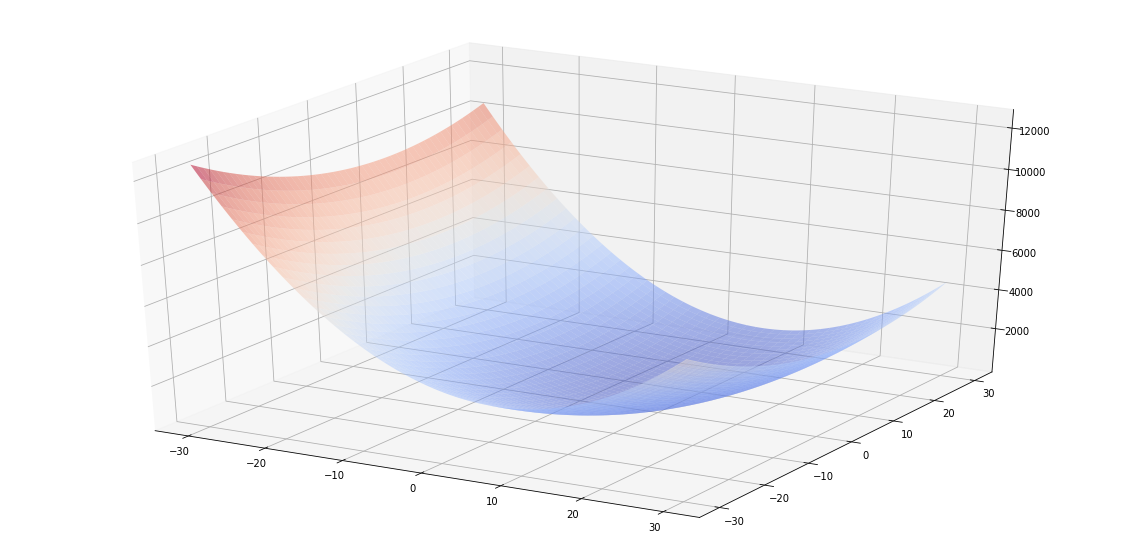

In [ ]:
def f1(x, y):
    return 7 * (x - 7) ** 2 + 2 * (y - 9) ** 2

def grad1(x, y):
    return [14 * (x  - 7), 4 * (y - 9)]

def dist(p1, p2):
    return (p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2

def print_3d(f):
    t = np.linspace(-30, 30, 1000)
    X, Y = np.meshgrid(t, t)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, f(X, Y), cmap=cm.coolwarm, alpha=0.5)

print_3d(f1)
# t = np.linspace(-30, 30, 1000)
# X, Y = np.meshgrid(t, t)
# ax = plt.figure().add_subplot(projection='3d')
# ax.plot_surface(X, Y, f1(X, Y))

# 1. Градиентный спуск с постоянным шагом

Градиентный спуск с постоянным шагом, ограниченный точностью по значению функции до ɛ

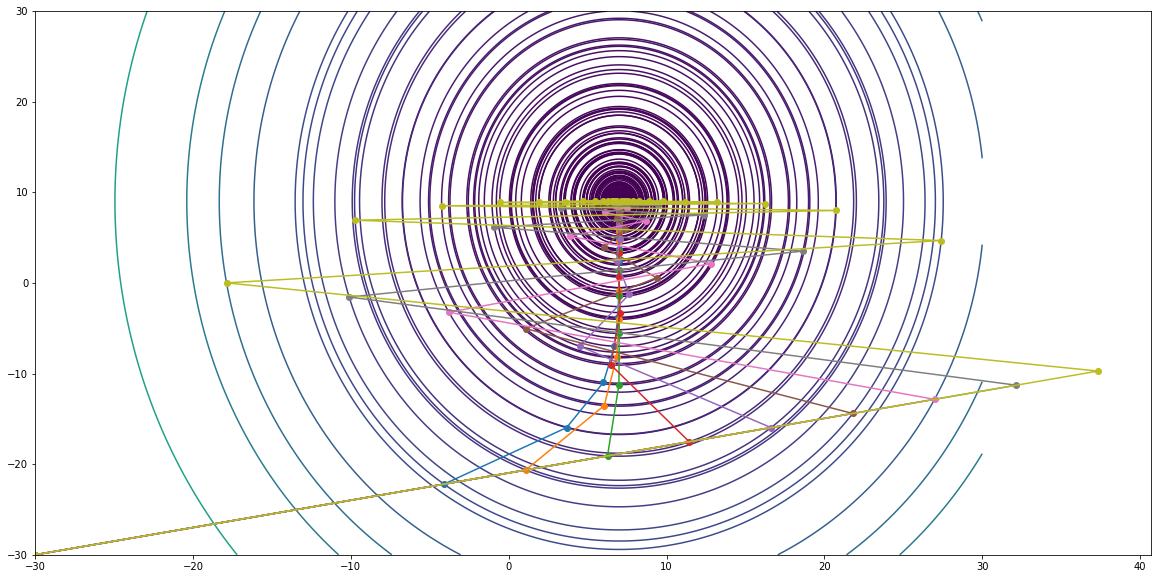

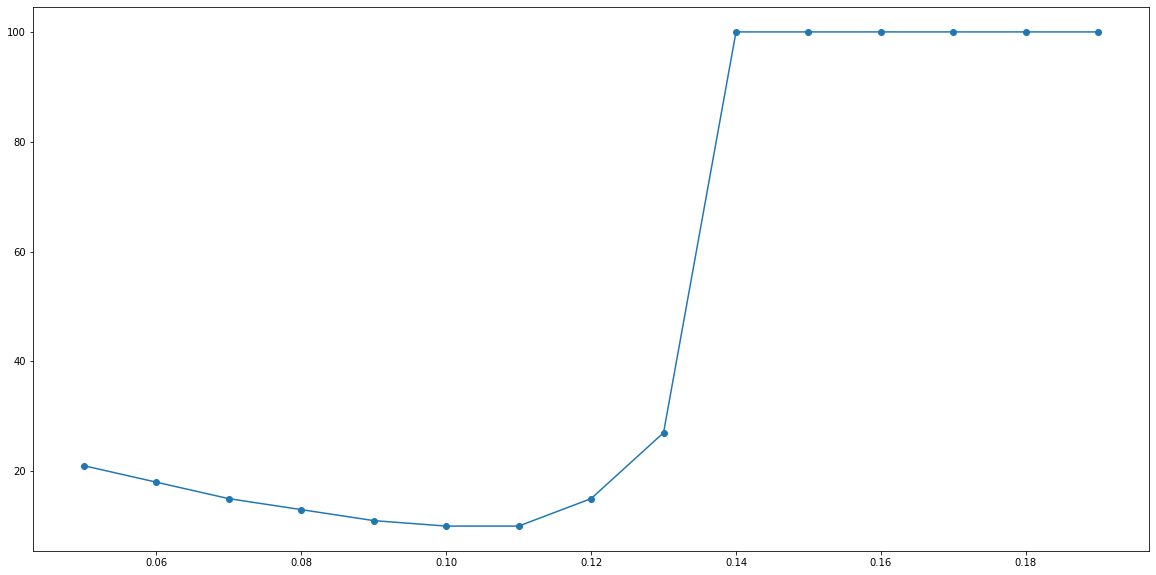

In [ ]:
def gr_1(f, grad, lr, x, flag_3d):
    epsilon = 1e-1  # До какой точности
    points = np.zeros((1, 2))
    points[0] = x
    x = x - lr * np.array(grad(x[0], x[1]))

    # while dist(x, points[-1]) > epsilon: # точность по дистанции между точками
    while abs(f(x[0], x[1]) - f(points[-1, 0], points[-1, 1])) > epsilon: # по значению функции
        if points.shape[0] - 1 >= 100:
            #if not flag_3d: print("Can't reach defined precision. It takes more than 100 iterations")
            return 100
        points = np.append(points, [x], axis=0)
        x = x - lr * np.array(grad(x[0], x[1]))
    else:        
        if flag_3d:
            plt.plot(points[:, 0], points[:, 1], f(points[:, 0], points[:, 1]), 'or-', )
        else:
            #print("Current lr=", lr, " Iterations spent: ", points.shape[0] - 1)
            plt.plot(points[:, 0], points[:, 1], 'o-', )
        plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))
    return points.shape[0] - 1

# print_3d(f1)
ma_1_m30_m30 = np.zeros((1, 2))
for i in range(5, 20, 1):
    ma_1_m30_m30 = np.append(ma_1_m30_m30, [[i/100, gr_1(f1, grad1, i / 100, [-30, -30], False)]],axis=0)
plt.show()
plt.plot(ma_1_m30_m30[1:, 0], ma_1_m30_m30[1:, 1], 'o-')

# 2. Градиентный спуск с экспоненциальной функцией изменения шага
[Источник](https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1)

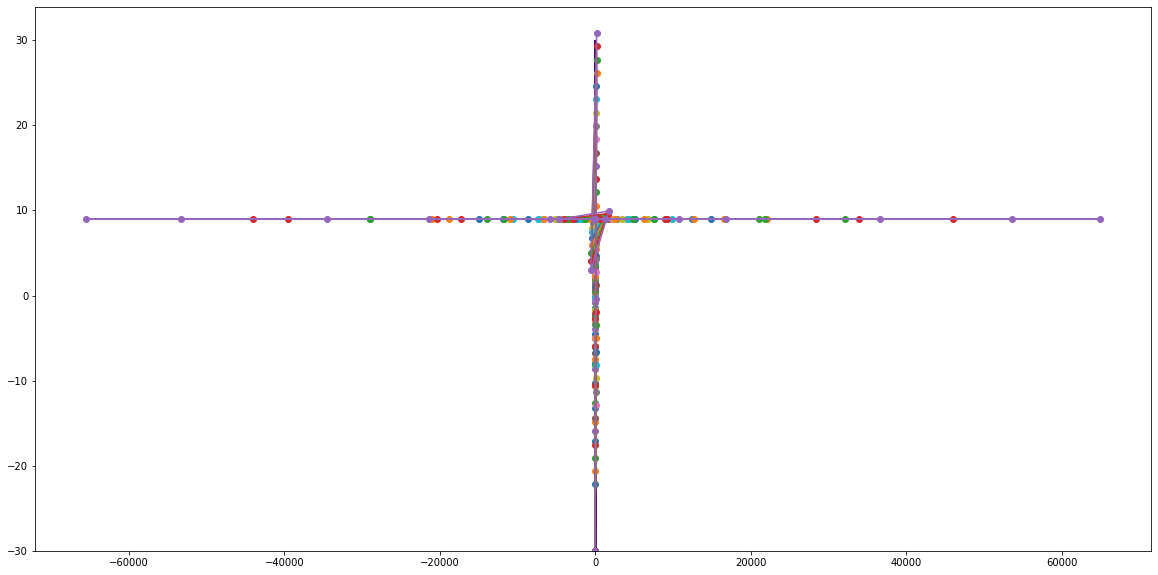

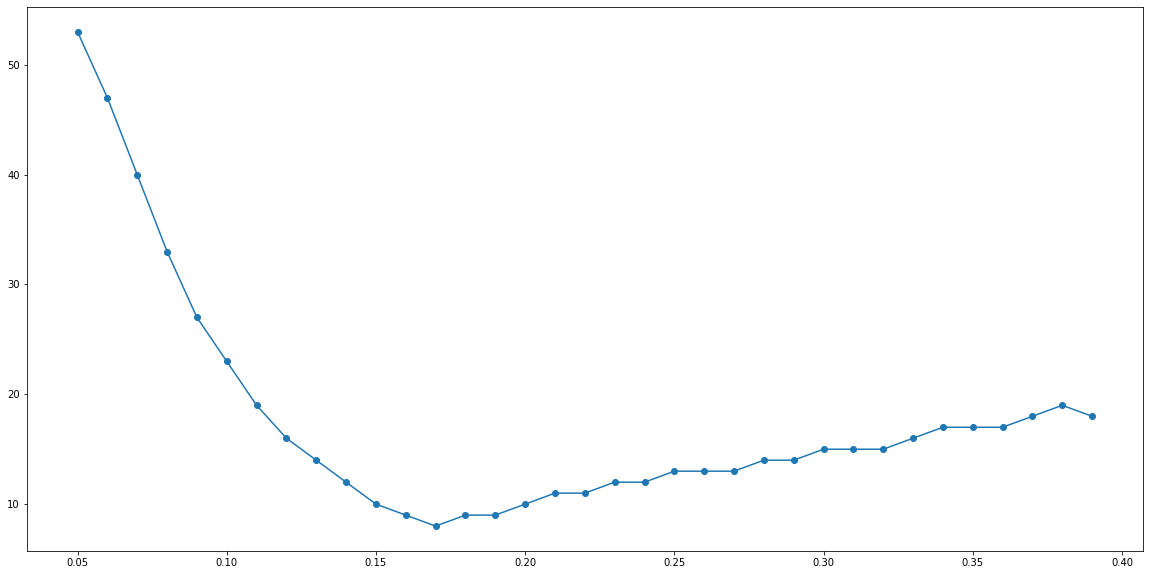

In [ ]:
def cur_lr(initial_lr, iteration, k):
    return initial_lr * math.exp(-k * iteration)


def gr_2(f, grad, lr, x, flag_3d):
    epsilon = 1e-1  # До какой точности
    #x = [-30, -30]  # стартовая точка
    k = 0.1
    iteration = 1
    points = np.zeros((1, 2))
    points[0] = x
    x = x - lr * np.array(grad(x[0], x[1]))
    # while dist(x, points[-1]) > epsilon: # точность по дистанции между точками
    while abs(f(x[0], x[1]) - f(points[-1, 0], points[-1, 1])) > epsilon:  # по значению функции
        if points.shape[0] - 1 >= 100:
            if not flag_3d: print("Can't reach defined precision. It takes more than 100 iterations")
            return 100
        points = np.append(points, [x], axis=0)
        iteration += 1
        x = x - cur_lr(lr, iteration, k) * np.array(grad(x[0], x[1]))
    else:
        if flag_3d:
            plt.plot(points[:, 0], points[:, 1], f(points[:, 0], points[:, 1]), 'or-', )
        else:
            #print("Current lr=", lr, " Iterations spent: ", points.shape[0] - 1)
            plt.plot(points[:, 0], points[:, 1], 'o-', )
        plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))
    return points.shape[0] - 1

ma_2_m30_m30 = np.zeros((1, 2))
for i in range(5, 20, 1):
    ma_2_m30_m30 = np.append(ma_2_m30_m30, [[i / 100, gr_2(f1, grad1, i / 100, [-30, -30], False)]],axis=0)
plt.show()
plt.plot(ma_2_m30_m30[1:, 0], ma_2_m30_m30[1:, 1], 'o-')

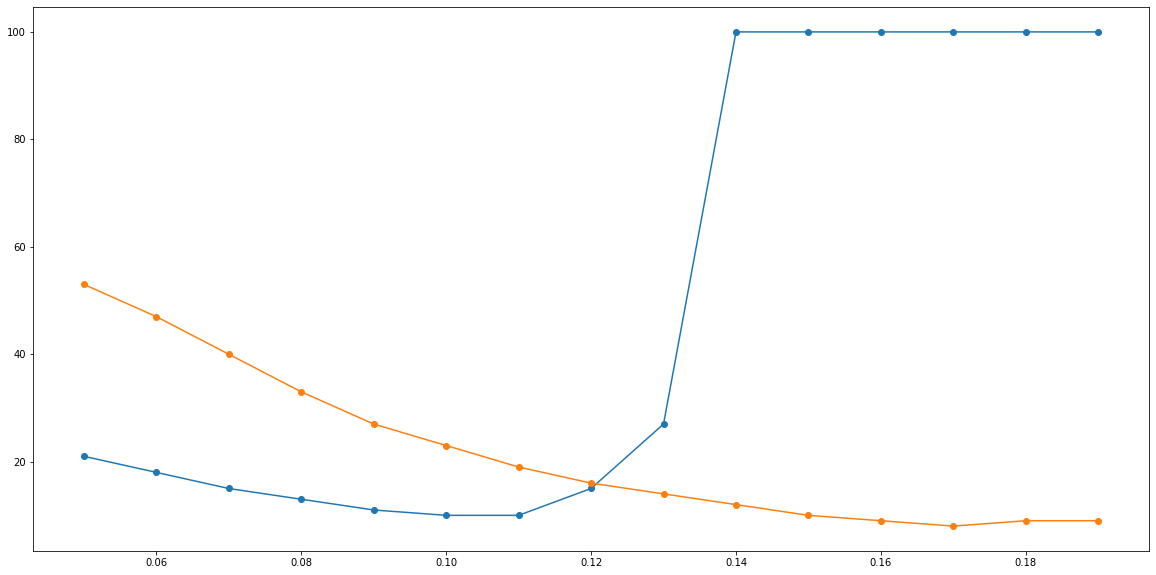

In [ ]:
plt.plot(ma_1_m30_m30[1:, 0], ma_1_m30_m30[1:, 1], 'o-')
plt.plot(ma_2_m30_m30[1:, 0], ma_2_m30_m30[1:, 1], 'o-')

# 3. Градиентный спуск с методом одномерного поиска

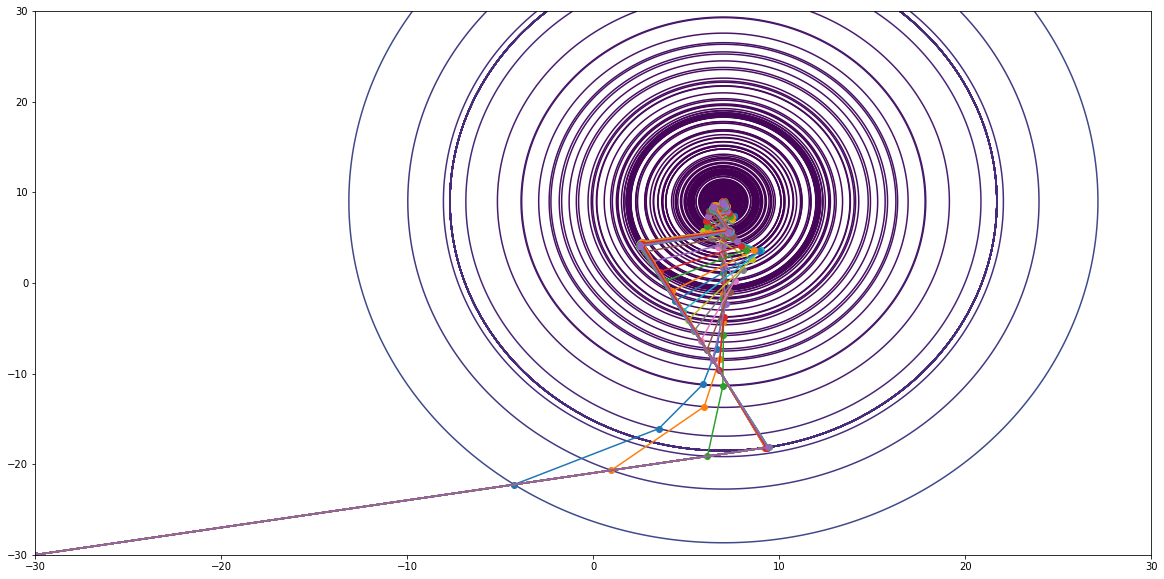

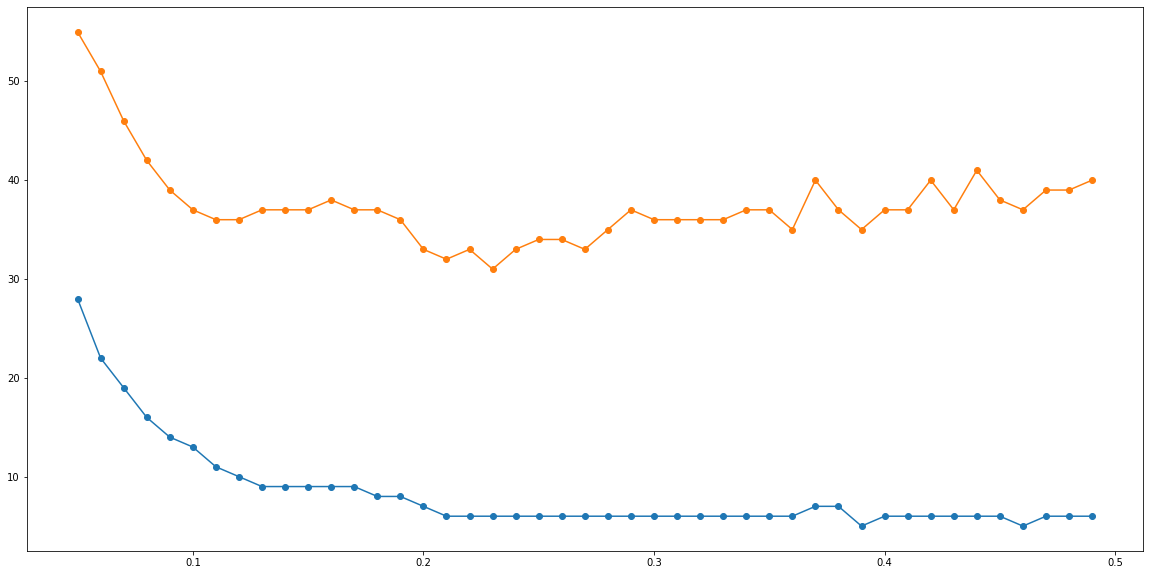

In [ ]:
dih_iterations = 0

def dih(f, x0, x3, epsilon):
    global dih_iterations
    delta = ((x3 - x0) / dist(x3, x0) ** 0.5) * epsilon / 2
    while dist(x0, x3) > epsilon:
        dih_iterations += 1
        x1 = (x3 + x0) / 2 - delta
        x2 = (x3 + x0) / 2 + delta
        # print(f(x1[0], x1[1]), f(x2[0], x2[1]))
        # print(x0, x1, x2, x3)
        if f(x1[0], x1[1]) < f(x2[0], x2[1]):
            x3 = x2
        else:
            x0 = x1

    # print()
    return (x3 + x0) / 2

def gr_3(f, grad, lr, x, flag_3d):
    global dih_iterations
    # lr = 0.2  # шаг
    epsilon = 1e-1  # До какой точности
    # x = [-30, -30]  # стартовая точка
    dih_iterations = 0
    points = np.zeros((1, 2))
    points[0] = x
    x = x - lr * np.array(grad(x[0], x[1]))
    x = dih(f, points[-1], x, epsilon)
    # while dist(x, points[-1]) > epsilon: # точность по дистанции между точками
    while abs(f(x[0], x[1]) - f(points[-1, 0], points[-1, 1])) > epsilon:  # по значению функции
        if points.shape[0] - 1 >= 100:
            #if not flag_3d: print("Can't reach defined precision. It takes more than 100 iterations")
            return 100, dih_iterations
        points = np.append(points, [x], axis=0)
        x = x - lr * np.array(grad(x[0], x[1]))
        x = dih(f, points[-1], x, epsilon)
    else:
        if flag_3d:
            plt.plot(points[:, 0], points[:, 1], f(points[:, 0], points[:, 1]), 'or-', )
        else:
            #print("Current lr=", lr, "; Iterations spent:", points.shape[0] - 1, "; Dichotomy summary iterations:", dih_iterations)
            plt.plot(points[:, 0], points[:, 1], 'o-', )
        plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))
    return points.shape[0] - 1, dih_iterations

# print_3d(f1)
"""
ma_3_m30_m30 = []
for i in range(5, 30, 1):
    ma_3_m30_m30.append([i / 100, gr_3(f1, grad1, i / 100, [-30, -30], False)])
"""
ma_3_m30_m30 = np.zeros((1, 3))
for i in range(5, 50, 1):
    a, b = gr_3(f1, grad1, i / 100, [-30, -30], False)
    ma_3_m30_m30 = np.append(ma_3_m30_m30, [[i / 100, a, b]],axis=0)
plt.show()
plt.plot(ma_3_m30_m30[1:, 0], ma_3_m30_m30[1:, 1], 'o-')
plt.plot(ma_3_m30_m30[1:, 0], ma_3_m30_m30[1:, 2], 'o-')

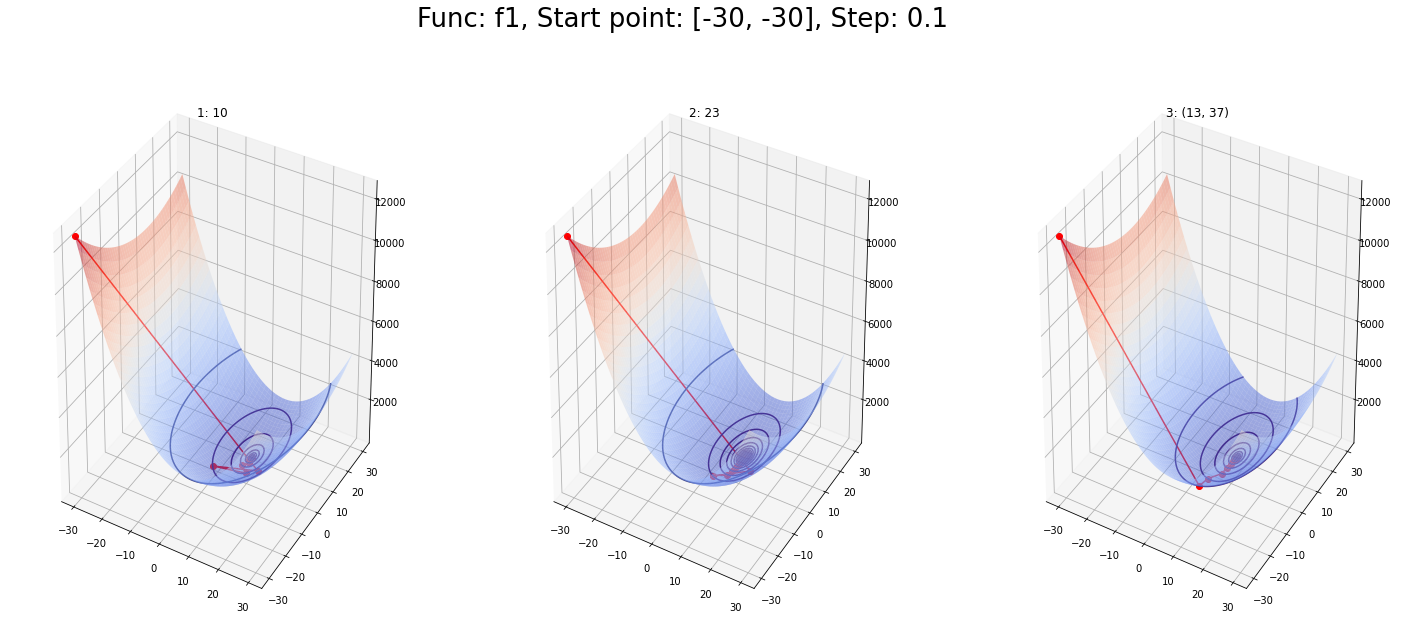

In [ ]:
def f1(x, y):
    return 7 * (x - 7) ** 2 + 2 * (y - 9) ** 2

def grad1(x, y):
    return [14 * (x  - 7), 4 * (y - 9)]

def f2(x, y):
    return (x) ** 2 + 10 * (y) ** 2

def grad2(x, y):
    return [2 * (x), 20 * (y)]

def print_all(f, grad, lr, P):

    fig = plt.figure(figsize=(25,10))
    fig.suptitle("Func: {}, Start point: {}, Step: {}".format(f.__name__, P, lr), fontsize=26)
    #print_3d(f, fig)
    t = np.linspace(-30, 30, 1000)
    X, Y = np.meshgrid(t, t)

    ax = fig.add_subplot(1, 3, 1, projection='3d')
    ax.plot_surface(X, Y, f(X, Y), cmap=cm.coolwarm, alpha=0.5)
    zn = gr_1(f, grad, lr, P, True)
    plt.title("1: {}".format(zn))

    bx = fig.add_subplot(1, 3, 2, projection='3d')
    bx.plot_surface(X, Y, f(X, Y), cmap=cm.coolwarm, alpha=0.5)
    zn = gr_2(f, grad, lr, P, True)
    plt.title("2: {}".format(zn))

    cx = fig.add_subplot(1, 3, 3, projection='3d')
    cx.plot_surface(X, Y, f(X, Y), cmap=cm.coolwarm, alpha=0.5)
    zn = gr_3(f, grad, lr, P, True)
    plt.title("3: {}".format(zn))
    
    plt.show()

print_all(f1, grad1, 0.1, [-30, -30])


1. Правильно подобрав размер шага для спуска с постоянным шагом функция, хоть и петляет в начале, ходя зигзагами, но в итоге сходится быстрее всего. ✅
2. Из-за того, что шаг в начале был оптимальным, спуску с экспоненциальным изменением шага потребовалось больше всего итераций. ✅
3. Спуск на дихотомии не петляет, почти доходя до минимума по одной координате за одну итерацию. ✅

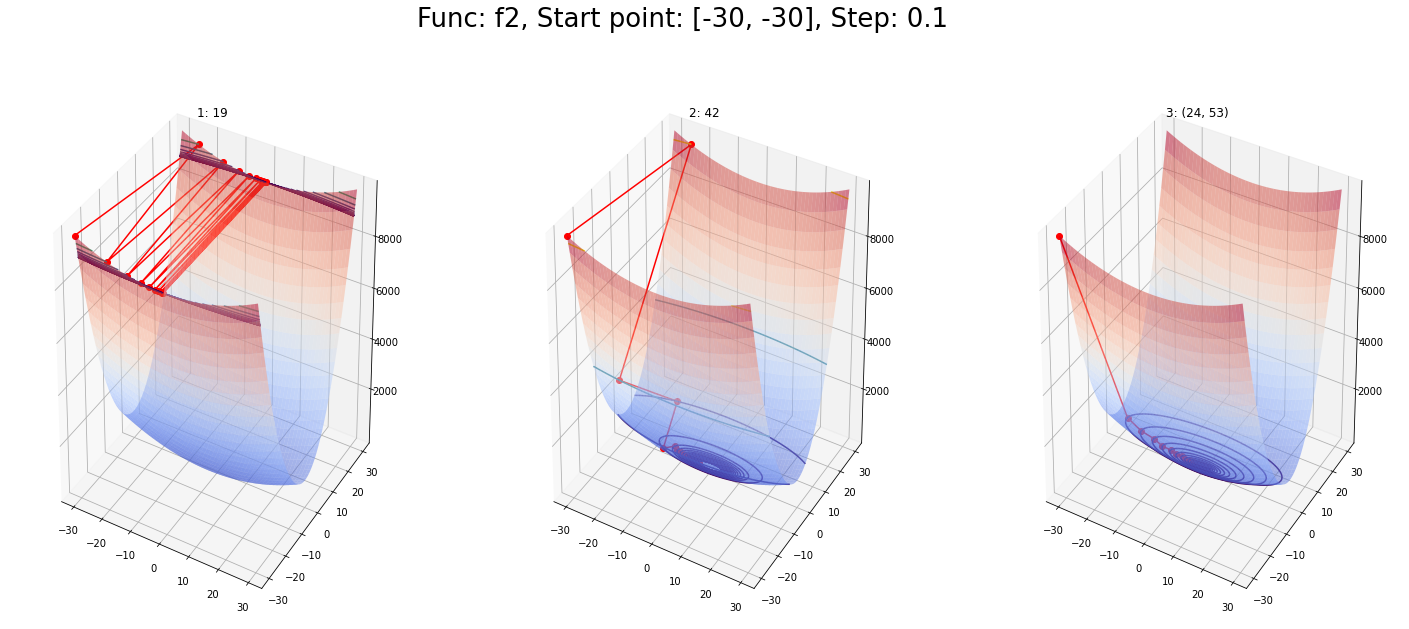

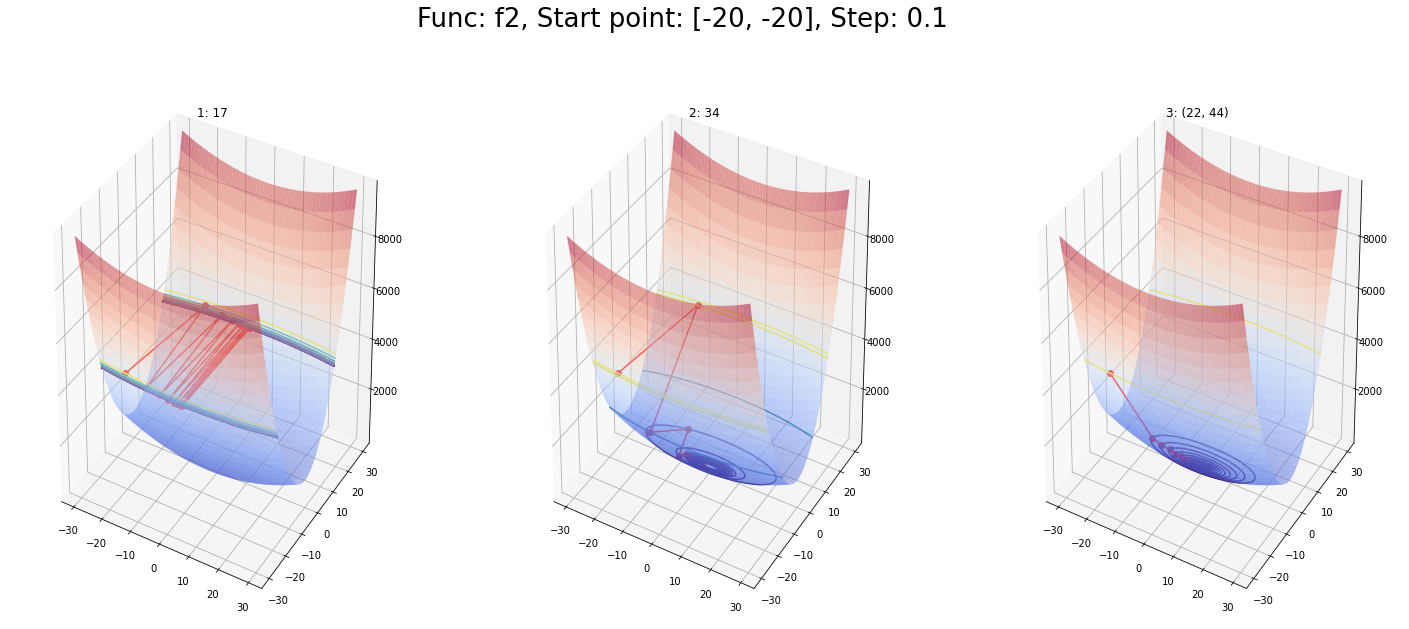

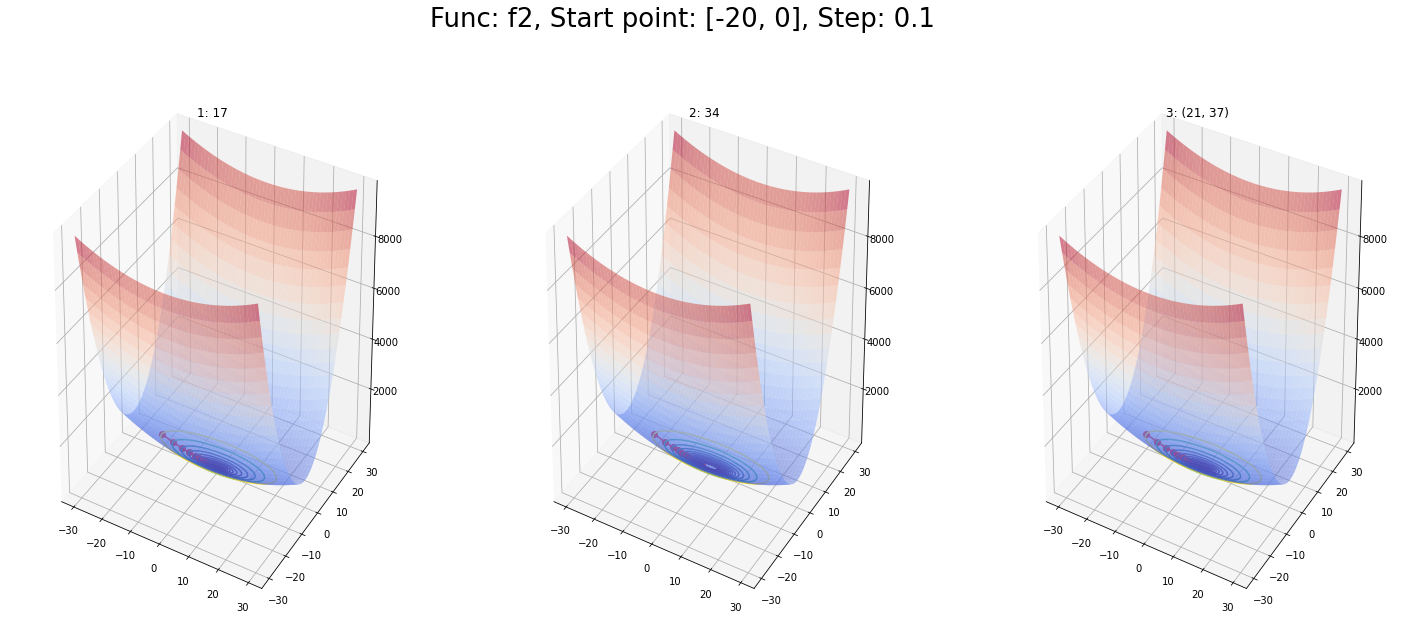

In [ ]:
print_all(f2, grad2, 0.1, [-30, -30])
print_all(f2, grad2, 0.1, [-20, -20])
print_all(f2, grad2, 0.1, [-20, 0])

1. Неправильно подобрав размер шага, спуск с постоянным шагом выдает ответ - быстро, но не тот, который ожидался. ❌
2. Спуск с экспоненциальным шагом работает дольше, но выдает более точный ответ по сравнению с предыдущим алгоритмом. ✅
3. Спуск с одномерным поиском завершается с усредненным количеством итераций и наиболее точным ответом. Однако общее время работы значительно выше из-за побочных вычислений. ✅

